 **ESERCITAZIONE 2**\
 Argomenti: approssimazione (polinomi interpolanti, splines)

In [1]:
import matplotlib.pyplot as plt
import scipy.interpolate as sp_interp
import numpy as np

---


**Esercizio 1**\
Determinare i polinomi di grado $n=5,9,13$ che interpolano la funzione di Runge $f(x)=\frac1{1+x^2}$ in nodi equidistanti nell’intervallo $[-5,5]$ e, per ciascuno dei tre casi, rappresentare graficamente la funzione di Runge, il polinomio interpolante e i dati di interpolazione. 

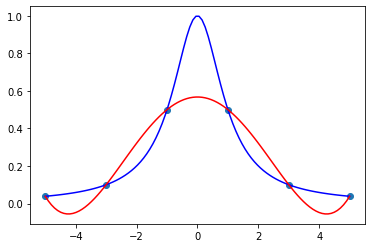

In [2]:
f = lambda x: 1/(1+x**2)
a, b = -5, 5

# funzione
z = np.linspace(a,b,100)
f_z = f(z)

# nodi equispaziati
n = 5
x = np.linspace(a, b, n+1)
y = f(x)

# interpolazione
c = np.polyfit(x, y, n)
p = np.polyval(c, z)

plt.plot(z,f_z,c="blue")
plt.plot(z,p,c="red")
plt.scatter(x,y)
plt.show()

Ripetere l’esercizio utilizzando i nodi di Chebyshev $t_i = -cos(\frac{(2i-1)\pi}{2(n+1)})$ con $i=1,...,n+1$, sull'intervallo $[-1,1]$ e opportunamente trasformati in punti dell’intervallo di interesse $[a,b]$, mediante la trasformazione
$$
x_i = \frac{b-a}{2}t_i + \frac{b+a}{2}.
$$
Al crescere del grado del polinomio, quale delle due scelte di nodi consente di definire un’approssimazione della funzione di Runge sempre più accurata?

Errore nodi equispaziati: 0.4303246159624491
Errore nodi di Chebyshev: 0.5534788672877786


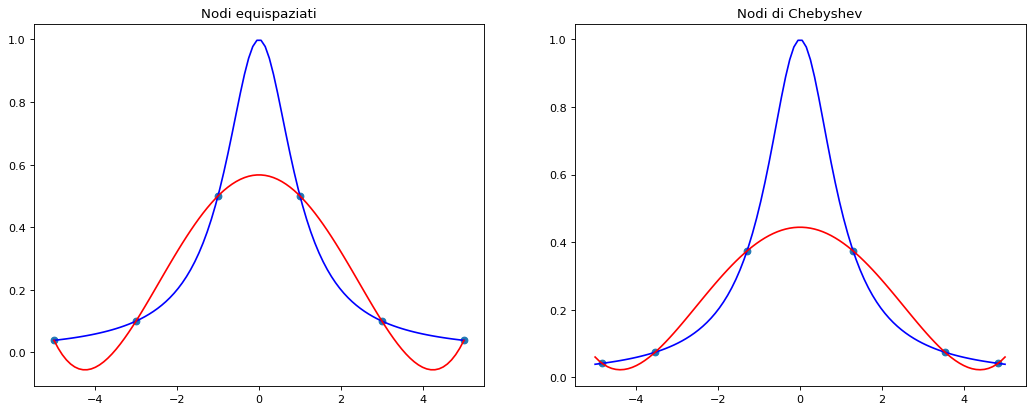

In [3]:
t = -np.cos((2* np.arange(1,n+2) - 1) * np.pi / (2 * (n + 1))) 
xC = (b - a) / 2 * t + (b + a) / 2
yC = f(xC)
cC = np.polyfit(xC, yC, n)
pC = np.polyval(cC, z)

errEqui = np.linalg.norm(p - f_z, np.Inf)
errChebyshev = np.linalg.norm(pC - f_z, np.Inf)

print("Errore nodi equispaziati:",errEqui)
print("Errore nodi di Chebyshev:",errChebyshev)
fig = plt.figure(figsize=(16, 6), dpi=80) # dimensione e risoluzione immagine complessiva 
fig.add_subplot(121) # uso la sottofigura 1 di una griglia 1x2 di figure
plt.plot(z,f_z,c="blue")
plt.plot(z,p,c="red")
plt.title("Nodi equispaziati")
plt.scatter(x,y)

fig.add_subplot(122) # uso la sottofigura 2 di una griglia 1x2 di figure
plt.plot(z,f_z,c="blue")
plt.plot(z,pC,c="red")
plt.scatter(xC,yC)
plt.title("Nodi di Chebyshev")
plt.show()

---

**Esercizio 3**

Rappresentare graficamente la spline cubica soddisfacente la condizione “not-a-knot” e interpolante la funzione $f(x)=\frac{1}{1+x^2}$ in $6,10,14$ nodi equidistanti nell’intervallo $[-5,5]$.

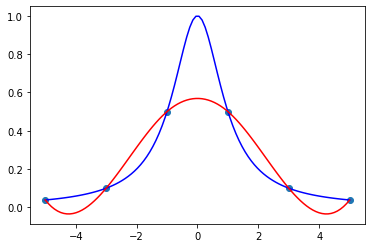

In [4]:
f = lambda x: 1/(1+x**2)
a, b = -5, 5

# funzione
z = np.linspace(a,b,100)
f_z = f(z)

# nodi equispaziati
n = 6
x = np.linspace(a, b, n)
y = f(x)

# spline
spline = sp_interp.CubicSpline(x,y)
ys = spline(z)

plt.plot(z,f_z,c="blue")
plt.plot(z,ys,c="red")
plt.scatter(x,y)
plt.show()

Confrontare i grafici ottenuti con quelli dell’esercizio 1 e commentare i risultati.

In [5]:
# nodi equispaziati
n = 13
xEqui = np.linspace(a, b, n+1)
yEqui = f(xEqui)

cEqui = np.polyfit(xEqui, yEqui, n)
pEqui = np.polyval(cEqui, z)

# nodi di Chebyshev
t = -np.cos((2* np.arange(1,n+2) - 1) * np.pi / (2 * (n + 1))) 
xCheb = (b - a) / 2 * t + (b + a) / 2
yCheb = f(xCheb)
cCheb = np.polyfit(xCheb, yCheb, n)
pCheb = np.polyval(cCheb, z)

# spline "not-a-knot"
xSpline = np.linspace(a, b, n+1)
ySpline = f(xSpline)
spline = sp_interp.CubicSpline(xSpline,ySpline)
evalSpline = spline(z)

In [6]:
errEqui = np.linalg.norm(pEqui - f_z, np.Inf)
errChebyshev = np.linalg.norm(pCheb - f_z, np.Inf)
errSpline = np.linalg.norm(evalSpline - f_z, np.Inf)

print("Errore nodi equispaziati:",errEqui)
print("Errore nodi di Chebyshev:",errChebyshev)
print("Errore spline:",errSpline)

Errore nodi equispaziati: 1.06446037158295
Errore nodi di Chebyshev: 0.12185501126172016
Errore spline: 0.049271596960250186


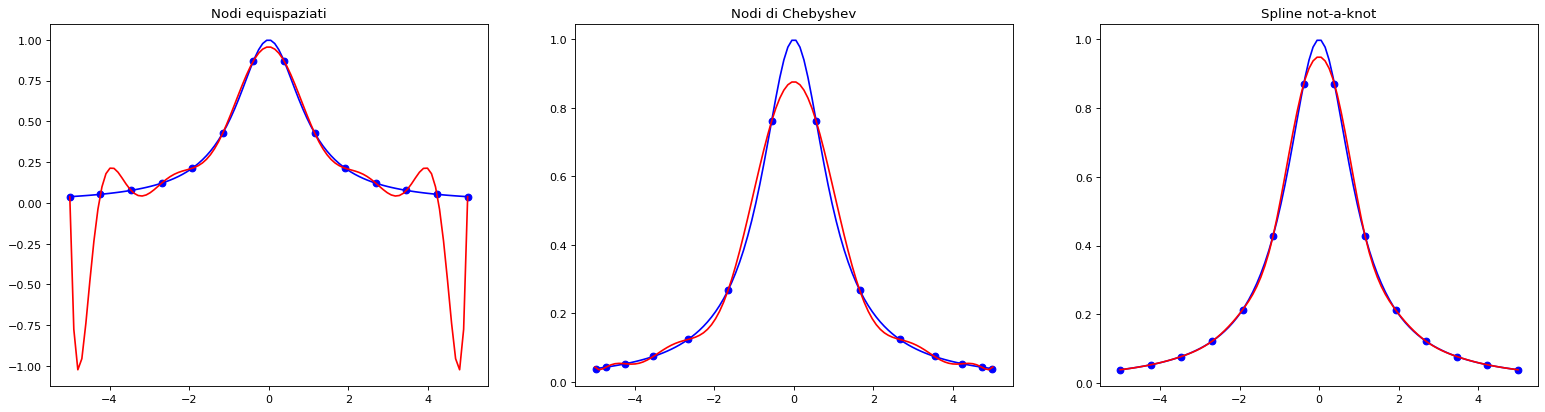

In [8]:
fig = plt.figure(figsize=(24, 6), dpi=80)

fig.add_subplot(131) # uso la sottofigura 1 di una griglia 1x3 di figure
plt.plot(z,f_z,c="blue")
plt.plot(z,pEqui,c="red")
plt.scatter(xEqui,yEqui,c="blue")
plt.title("Nodi equispaziati")

fig.add_subplot(132) # uso la sottofigura 2 di una griglia 1x3 di figure
plt.plot(z,f_z,c="blue")
plt.plot(z,pCheb,c="red")
plt.scatter(xCheb,yCheb,c="blue")
plt.title("Nodi di Chebyshev")

fig.add_subplot(133) # uso la sottofigura 3 di una griglia 1x3 di figure
plt.plot(z,f_z,c="blue")
plt.plot(z,evalSpline,c="red")
plt.scatter(xSpline,ySpline,c="blue")
plt.title("Spline not-a-knot")
plt.show()

---

**Esercizio 4**

Costruire la spline cubica $S_3(x)$ soddisfacente la condizione "not-a-knot" e $\bar{S}_3(x)$ soddisfacente le condizioni $\bar{S}'_3(x_0) = f'(x_0)$ e $\bar{S}'_3(x_n) = f'(x_n)$, interpolanti la funzione $f(x) = (1 - x^2 )^{\frac{5}{2}}$ nei nodi $x_i = -1 + \frac{2i}{n}$, $i=0,1,...,n$, con $n=2^k$ e $k=2,3,4,5$. 

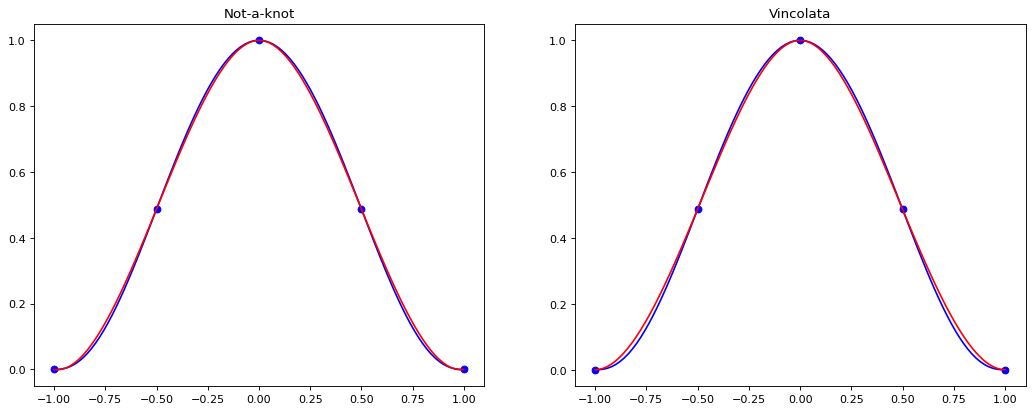

In [17]:
k = 2
n = 2**k

a, b = -1, 1

f = lambda x: (1 - x**2)**(5/2)
fDerivata = lambda x: (5/2)*(1 - x**2)**(5/2 - 1)*(-2*x)

fD0 = fDerivata(a)
fDn = fDerivata(b)

# Funzione
z = np.linspace(a, b, 100)
f_z = f(z)

# Spline
x = -1 + 2*np.arange(0,n+1) / n
y = f(x)

splineNAK = sp_interp.CubicSpline(x,y)
evalNAK = splineNAK(z)

# la sintassi bc_type=((a,b),(c,d)) significa che nell'estremo di sinistra impongo il valore b per la derivata di ordine a, 
# e che nell'estremo di desrta impongo il valore d per la derivata di ordine c
splineVincolata = sp_interp.CubicSpline(x,y,bc_type=((1, fD0), (1, fDn)))  
evalVincolata = splineVincolata(z)

fig = plt.figure(figsize=(16, 6), dpi=80)

fig.add_subplot(121) # uso la sottofigura 1 di una griglia 1x2 di figure
plt.plot(z,f_z,c="blue")
plt.plot(z,evalNAK,c="red")
plt.scatter(x,y,c="blue")
plt.title("Not-a-knot")

fig.add_subplot(122) # uso la sottofigura 2 di una griglia 1x2 di figure
plt.plot(z,f_z,c="blue")
plt.plot(z,evalVincolata,c="red")
plt.scatter(x,y,c="blue")
plt.title("Vincolata")
plt.show()

Rappresentare graficamente gli errori commessi nelle due approssimazioni in $100$ punti equidistanti dell’intervallo di interpolazione $[-1,1]$ e individuare quale delle due approssimazioni è più accurata.

Stampare, per ogni valore di $k$, il massimo errore assoluto commesso e dedurre, dandone una giustificazione, quale delle due spline, not-a-knot e vincolata, rappresenti un’approssimazione più accurata.

Errore spline not-a-knot: 0.01538383644644567
Errore spline vincolata: 0.023174191503924205


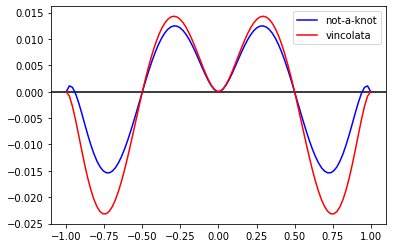

In [28]:
errNAK = np.linalg.norm(evalNAK - f_z, np.Inf)
errVincolata = np.linalg.norm(evalVincolata - f_z, np.Inf)

print("Errore spline not-a-knot:",errNAK)
print("Errore spline vincolata:",errVincolata)

plt.axhline(c="black")
plt.plot(z,f_z-evalNAK,c="blue", label="not-a-knot")
plt.plot(z,f_z-evalVincolata,c="red", label="vincolata")
plt.legend()
plt.show()